<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">  

<b> <font size='5'>  
ELEC PRICE PREDICTION CAPSTONE:</font>  

<font size='4'>CA Reservoir Water Storage Levels DataFrame Creation Notebook</font> </b>

<font size='3'>  
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Manu Kalia Project Submission<br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; DSI-7-SF<br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 15-May-2019<br>
</font>

---


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Reservoir-Storage-DataFrame-Columns" data-toc-modified-id="Reservoir-Storage-DataFrame-Columns-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reservoir Storage DataFrame Columns</a></span></li><li><span><a href="#Loop-Through-Files-&amp;-Append-Data" data-toc-modified-id="Loop-Through-Files-&amp;-Append-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loop Through Files &amp; Append Data</a></span></li><li><span><a href="#Export-to-.csv-File" data-toc-modified-id="Export-to-.csv-File-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Export to .csv File</a></span></li><li><span><a href="#Plot-CA-Water-Levels-Over-Time" data-toc-modified-id="Plot-CA-Water-Levels-Over-Time-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plot CA Water Levels Over Time</a></span></li></ul></div>

---

## Imports

In [1]:
import pandas as pd
import numpy as np

import wget, os
import time
import glob

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
sns.set_style('whitegrid')

---

## Reservoir Storage DataFrame Columns

In [2]:
res_strg_orig_cols=['DATE TIME',
                    'STATION_ID',
                    'VALUE']

res_strg_new_cols =['datetime',
                    'reservoir_id',
                    'water_acre_feet']

res_strg_rename_dict = {old: new for old, new in zip(res_strg_orig_cols,
                                                     res_strg_new_cols)}

## Loop Through Files & Append Data

In [3]:
res_strg_df = pd.DataFrame(columns=res_strg_new_cols)

for file in glob.glob('../raw_data/ca_dwr_dl/*.csv'):
    df = pd.read_csv(file, usecols=res_strg_orig_cols).rename(index=str,
                                                              columns=res_strg_rename_dict)
    
    
    res_strg_df = res_strg_df.append(df, ignore_index=True, sort=True)

In [4]:
res_strg_df = res_strg_df.sort_values(by='datetime').reset_index(drop=True)

res_strg_df['datetime'] = pd.to_datetime(res_strg_df['datetime'])

res_strg_df.set_index('datetime', inplace=True)
res_strg_df.sort_index(inplace=True)


res_strg_df.head()

,reservoir_id,water_acre_feet
datetime,,
2016-01-01,ENG,65363
2016-01-01,BLB,36887
2016-01-01,DAV,37246
2016-01-01,FRD,10736
2016-01-01,PAR,126964


In [5]:
res_strg_df = res_strg_df.tz_localize('America/Los_Angeles',
                        ambiguous=False
                        )

In [6]:
res_strg_df.tail()

,reservoir_id,water_acre_feet
datetime,,
2019-05-07 00:00:00-07:00,ANT,23886
2019-05-07 00:00:00-07:00,SCC,68750
2019-05-07 00:00:00-07:00,CMN,---
2019-05-07 00:00:00-07:00,BUL,916954
2019-05-07 00:00:00-07:00,LEW,14352


In [7]:
res_strg_df.shape

(1080658, 2)

In [8]:
res_strg_df.isna().sum()

reservoir_id       0
water_acre_feet    0
dtype: int64

In [9]:
res_strg_df.replace('---', np.nan, inplace=True)
res_strg_df.replace('ART', np.nan, inplace=True)
res_strg_df.replace('BRT', np.nan, inplace=True)

In [10]:
res_strg_df.isna().sum()

reservoir_id           0
water_acre_feet    35983
dtype: int64

In [11]:
res_strg_df.water_acre_feet.fillna(method='ffill', inplace=True)

In [12]:
res_strg_df.isna().sum()

reservoir_id       0
water_acre_feet    0
dtype: int64

In [13]:
res_strg_df.dtypes

reservoir_id       object
water_acre_feet    object
dtype: object

In [14]:
res_strg_df.water_acre_feet = res_strg_df.water_acre_feet.astype(int)

In [15]:
res_strg_df.dtypes

reservoir_id       object
water_acre_feet     int64
dtype: object

In [16]:
ca_water_levels = pd.DataFrame(res_strg_df.groupby('datetime')['water_acre_feet'].sum())

In [17]:
ca_water_levels.head()

,water_acre_feet
datetime,
2016-01-01 00:00:00-08:00,6610818
2016-01-01 01:00:00-08:00,6559389
2016-01-01 02:00:00-08:00,6840908
2016-01-01 03:00:00-08:00,6557979
2016-01-01 04:00:00-08:00,6534157


In [18]:
ca_water_levels.shape

(29325, 1)

In [19]:
ca_water_levels.tail()

,water_acre_feet
datetime,
2019-05-06 20:00:00-07:00,22344328
2019-05-06 21:00:00-07:00,22965365
2019-05-06 22:00:00-07:00,22348690
2019-05-06 23:00:00-07:00,22312882
2019-05-07 00:00:00-07:00,24411326


## Export to .csv File

In [20]:
res_strg_df.to_csv('../data/water_levels_by_reservoir.csv')

In [21]:
ca_water_levels.to_csv('../data/ca_water_levels.csv')

---

## Plot CA Water Levels Over Time

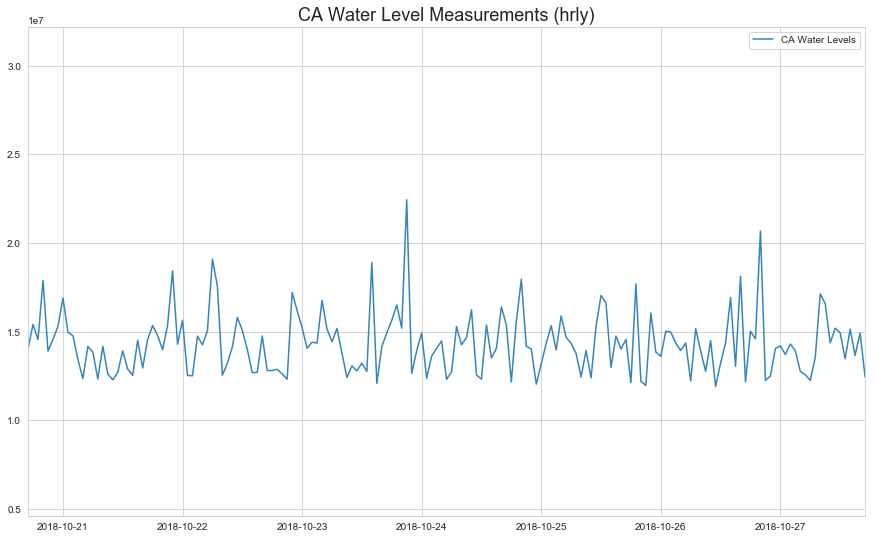

In [22]:
plt.figure(figsize=(15,9))
plt.title('CA Water Level Measurements (hrly)', fontsize=18)

plt.plot(ca_water_levels.index,
         ca_water_levels.water_acre_feet,
         label = 'CA Water Levels',
         alpha = 0.9)

plt.xlim('2018-10-21', '2018-10-28')

# plt.ylabel('Water Level (in Acre-feet)', fontsize=18)
plt.legend()
# plt.savefig('../images/ca_wtr_lev_1wk_oct18.jpg', bbox_inches='tight')
plt.show();